In [2]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
import matplotlib.animation as animation
import os
from matplotlib.widgets import Button


In [3]:
dicom_folder = "dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525"


In [9]:
#dicom_folder = pydicom.dcmread("dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525")

In [4]:
dataset = ["dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525","dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525", "dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-46999","dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-64164","dicom/1/C3L-02706/CT/STD/4.000000-1.25MM-13891","dicom/1/C3L-03260/CT/STD/201.000000-BRAIN STD-97563", "dicom/1/C3L-03266/CT/STD/2.000000-WAND HEAD ST-68337", "dicom/2/C3L-03728/CT/STD/2.000000-HEAD STD-06783","dicom/2/C3N-01196/CT/STD/2.000000-2.5-67998", "dicom/2/C3N-02255/CT/STD","dicom/2/C3N-02256/CT/STD/2.000000-2.5-90422",
                     "dicom/3/ACRIN-FMISO-Brain-001/CT/STD/3.000000-CT 2.5MM STD-46877",
                     "dicom/3/ACRIN-FMISO-Brain-001/CT/STD/3.000000-CT 2.5MM STD-58467",
                     "dicom/3/ACRIN-FMISO-Brain-001/CT/STD/3.000000-CT 2.5MM STD-66340",
                     "dicom/3/ACRIN-FMISO-Brain-004/CT/BW/3.000000-Recon 2 CTAC 3.75 thick-68491",
                     "dicom/3/ACRIN-FMISO-Brain-004/CT/BW/4.000000-Recon 3 LOW DOSE CTAC-93132",
                     "dicom/4/ACRIN-FMISO-Brain-010/CT/STD/3.000000-Standard-97245",
                     "dicom/4/ACRIN-FMISO-Brain-011/CT/STD/2.000000-CT-37747",
                     "dicom/4/ACRIN-FMISO-Brain-011/CT/STD/2.000000-CT-37747",
                     "dicom/4/ACRIN-FMISO-Brain-011/CT/STD/2.000000-CT-42830",
                     "dicom/4/ACRIN-FMISO-Brain-015/CT/STD/2.000000-CT-90806",
                     "dicom/4/ACRIN-FMISO-Brain-015/CT/STD/2.000000-CT-90806",
                     "dicom/4/ACRIN-FMISO-Brain-018/CT/STD/3.000000-CT BRAIN-51590",
                     "dicom/5/ACRIN-FMISO-Brain-019/CT/BW/5.000000-Recon 3 CTAC 5mm thick-60962",
                     "dicom/5/ACRIN-FMISO-Brain-025/CT/STD/394718926.000000-55958",
                     "dicom/6/ACRIN-FMISO-Brain-027/CT/BW/8.000000-Recon 3 CTAC 5mm thick-97364",
                     "dicom/6/ACRIN-FMISO-Brain-028/CT/STD/3.000000-CT 2.5MM STD-26916",
                     "dicom/6/ACRIN-FMISO-Brain-029/CT/STD/3.000000-CT 2.5MM STD-81719",
                     "dicom/6/ACRIN-FMISO-Brain-031/CT/STD/2.000000-CTAC SLICES-17303",
                     "dicom/7/ACRIN-FMISO-Brain-033/CT/STD/2.000000-HEAD WO-71432",
                     "dicom/7/ACRIN-FMISO-Brain-034/CT/STD/2.000000-CT-60256",
                     "dicom/7/ACRIN-FMISO-Brain-038/CT/BW/4.000000-Recon 3 CTAC LOW DOSE-38568",
                     "dicom/7/ACRIN-FMISO-Brain-039/CT/STD/3.000000-CT 2.5MM STD-12405",
                     "dicom/8/ACRIN-FMISO-Brain-040/CT/STD/3.000000-CT 2.5MM STD-04198",
                     "dicom/8/ACRIN-FMISO-Brain-042/CT/STD/3.000000-Standard-47424",
                     "dicom/8/ACRIN-FMISO-Brain-044/CT/STD/3.000000-Standard-76069",
                     "dicom/8/ACRIN-FMISO-Brain-045/CT/STD/3.000000-Standard-07920",
                     "dicom/9/ACRIN-FMISO-Brain-046/CT/STD/3.000000-Standard-60406",
                     
                     "dicom/11/TCGA-14-0783/CT/STD/2.000000-41784",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-03055",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-06222",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-10888",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-24646",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-55092",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-86756",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-95120",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-27821",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-63916",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-Routine Head-27045",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-Routine Head-34640",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-Routine Head-53645",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-Routine Head-88840",
                     "dicom/11/TCGA-14-0865/CT/STD/2.000000-26793",
                     "dicom/11/TCGA-14-0865/CT/STD/2.000000-58416",
                     "dicom/11/TCGA-14-1037/CT/STD/2.000000-00860"
                     ]

In [6]:
import random

In [7]:
random.shuffle(dataset)

# Calculate the split index for a 60% train / 40% test split
split_index = int(0.6 * len(dataset))

# Split the dataset into training and testing lists
train_paths = dataset[:split_index]

test_paths = dataset[split_index:]
print("Number of training samples:", len(train_paths))
print("Number of testing samples:", len(test_paths))

Number of training samples: 33
Number of testing samples: 22


In [10]:
train_paths2 = []
for path in train_paths:
    train_paths2.append(sorted([os.path.join(dicom_folder, f) for f in os.listdir(path) if f.endswith(".dcm")]))


In [11]:
test_paths2 = []
for path in test_paths:
    test_paths2.append(sorted([os.path.join(dicom_folder, f) for f in os.listdir(path) if f.endswith(".dcm")]))


In [12]:
train_paths2

[['dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-01.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-02.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-03.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-04.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-05.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-06.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-07.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-08.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-09.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-10.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-11.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-12.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-13.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-14.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-15.dcm',
  'dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525/1-1

In [13]:
def animate(dicom_files):
    ani = []
    for file in dicom_files:
        print(file)
        dicom_file = pydicom.dcmread(file)
        pixel_data=dicom_file.pixel_array
        pixel_data = (pixel_data - np.min(pixel_data)) / (np.max(pixel_data) - np.min(pixel_data))
        # Rescale pixel data to 8-bit if necessary
        if pixel_data.dtype != np.uint8:
            pixel_data = (pixel_data - pixel_data.min()) / (pixel_data.max() - pixel_data.min()) * 255
            pixel_data = pixel_data.astype(np.uint8)
            
        image = Image.fromarray(pixel_data)
        ani.append(image.copy())
    print(len(ani))
    ani[0].save('movie.gif', save_all=True, append_images=[ani[1]]*10+ani[1:]+[ani[-1]]*10+ani[1:][::-1], duration=100, loop=0)

In [14]:
import math

In [15]:
def fourier_transform(dicom_files):
    fourier_list =[]
    for file in dicom_files:
        ani = []
        fourier = []
        for file in dicom_files:
            dicom_file = pydicom.dcmread(file)        
            pixel_data = dicom_file.pixel_array.astype(float)
            pixel_data = pixel_data / np.sqrt(np.sum(pixel_data **2))
            fourier_transform = np.fft.fft2(pixel_data**2) #**2
            fourier_shifted = np.fft.fftshift(fourier_transform)
            fourier.append(fourier_shifted)
            magnitude_spectrum = np.log(1 + np.abs(fourier_shifted))
            magnitude_spectrum = (magnitude_spectrum - np.min(magnitude_spectrum)) / (np.max(magnitude_spectrum) - np.min(magnitude_spectrum))
            magnitude_spectrum = (magnitude_spectrum * 255).astype(np.uint8)

            image = Image.fromarray(magnitude_spectrum)

            # Append to animation list
            ani.append(image.copy())
        ani[0].save('transformed.gif', save_all=True, append_images=ani[1:], duration=100, loop=0)
        fourier_list.append(fourier)
    return fourier_list


In [ ]:
    animate(dicom_files)


In [20]:
fourier_train = []
for path in train_paths:
    dicom_files = sorted([os.path.join(path, f) for f in os.listdir(path) if f.endswith(".dcm")])
    fourier_train.append(fourier_transform(dicom_files))

: 

In [12]:
fourier_test = []
print(len(test_paths))
i = 0
for path in test_paths:
    print(i)
    dicom_files = sorted([os.path.join(path, f) for f in os.listdir(path) if f.endswith(".dcm")])

    fourier_test.append(fourier_transform(dicom_files))

22
0
0


: 

In [140]:
def reconstruct_image(magnitude, phase):
    # Invert log: amplitude = exp(magnitude) - 1
    amplitude = np.exp(magnitude) - 1
    # Recombine amplitude and phase to get complex Fourier coefficients
    F_reconstructed = amplitude * np.exp(1j * phase)
    # Inverse FFT shift and then inverse FFT to get back to image domain
    F_ishift = np.fft.ifftshift(F_reconstructed)
    img_reconstructed = np.fft.ifft2(F_ishift)
    return np.real(img_reconstructed)

In [ ]:
def extract_phase_spectrum(fourier):
    magnitude_features =[]
    phase_features = []
    for fourier_shifted in fourier:
        magnitude = np.log(1 + np.abs(fourier_shifted))
        phase_spectrum = np.angle(fourier_shifted)
        magnitude_features.append(magnitude)
        phase_features.append(phase_spectrum)
    magnitude_features, phase_features
    image = reconstruct_image(magnitude_features, phase_features)
    return image 
    



In [2]:
image_fourerized = []
for path in fourier_train:

    image_fourerized.append(fourier_transform(path))

In [101]:
reconstructed_images = [reconstruct_image(m, p) for m, p in zip(magnitude_features, phase_features)]


In [102]:
import torch

In [103]:

image_tensor = torch.from_numpy(reconstructed_images[0]).float()


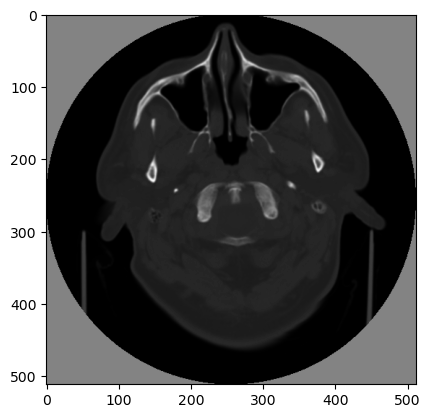

In [104]:
plt.imshow(reconstructed_images[1], cmap='gray')


In [116]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CTSetDataset(Dataset):

    def __init__(self, list_of_sets, transform=None):

        self.list_of_sets = list_of_sets
        self.transform = transform if transform is not None else transforms.ToTensor()

    def __len__(self):
        return len(self.list_of_sets)

    def __getitem__(self, idx):
        # Each set: list of images (H, W)
        ct_set = self.list_of_sets[idx]
        # Convert each image to a tensor and ensure it has a channel dimension.
        slices = [self.transform(img).float() if isinstance(img, np.ndarray) 
                  else img.float() for img in ct_set]
        # Stack to get shape (seq_len, 1, H, W)
        full_scan = torch.stack(slices, dim=0)
        
        seq_len = full_scan.shape[0]
        # Create a mask: ones indicate available slices.
        mask = torch.ones(seq_len)
        # Randomly drop one slice (simulate partial scan)
        missing_idx = np.random.randint(0, seq_len)
        mask[missing_idx] = 0
        
        # Create partial scan by zeroing out the missing slice.
        partial_scan = full_scan.clone()
        partial_scan[missing_idx] = 0.0
        
        return partial_scan, mask, full_scan


class StandardInpaintingGenerator(nn.Module):

    def __init__(self, seq_len, channels, H, W):
        super(StandardInpaintingGenerator, self).__init__()
        self.seq_len = seq_len
        self.channels = channels
        self.H = H
        self.W = W
        
        # Process each slice individually.
        # We add the mask as an extra channel so the network knows whether a slice is known.
        # Input per slice: (channels+1, H, W)
        self.slice_net = nn.Sequential(
            nn.Conv2d(in_channels=channels + 1, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=channels, kernel_size=3, padding=1),
            nn.Tanh()  # outputs in [-1, 1]
        )
    
    def forward(self, partial_scan, mask):
  
        batch, seq_len, channels, H, W = partial_scan.shape
        completed_slices = []
        for t in range(seq_len):
            slice_t = partial_scan[:, t, :, :, :]   # (batch, channels, H, W)
            m_t = mask[:, t].unsqueeze(1).unsqueeze(2).unsqueeze(3).float()  # (batch, 1, 1, 1)
            m_t = m_t.expand(batch, 1, H, W)         # (batch, 1, H, W)
            
            input_t = torch.cat([slice_t, m_t], dim=1)  # (batch, channels+1, H, W)
            
            gen_slice = self.slice_net(input_t)         # (batch, channels, H, W)
            
            m_t_expanded = m_t.expand(batch, channels, H, W)
            comp_slice = m_t_expanded * slice_t + (1 - m_t_expanded) * gen_slice
            completed_slices.append(comp_slice.unsqueeze(1))  # (batch, 1, channels, H, W)
        
        completed_scan = torch.cat(completed_slices, dim=1)  # (batch, seq_len, channels, H, W)
        return completed_scan

class StandardDiscriminator(nn.Module):

    def __init__(self, seq_len, channels, H, W):
        super(StandardDiscriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv3d(in_channels=channels, out_channels=16, kernel_size=3, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv3d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.LeakyReLU(0.2),
            nn.AdaptiveAvgPool3d(1)  # -> (batch, 32, 1, 1, 1)
        )
        self.fc = nn.Linear(32, 1)
    
    def forward(self, x):
        x = x.permute(0, 2, 1, 3, 4)
        features = self.net(x)  # (batch, 32, 1, 1, 1)
        features = features.view(features.size(0), -1)  # (batch, 32)
        logit = self.fc(features)  # (batch, 1)
        return logit


def train_inpainting_gan_dataset(full_scans_list):

    seq_len = 5
    channels = 1    
    H, W = 64, 64
    batch_size = 4
    num_epochs = 10
    lr = 1e-4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    dataset = CTSetDataset(full_scans_list, transform=transforms.ToTensor())
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    G = StandardInpaintingGenerator(seq_len=seq_len, channels=channels, H=H, W=W).to(device)
    D = StandardDiscriminator(seq_len=seq_len, channels=channels, H=H, W=W).to(device)
    
    opt_G = optim.Adam(G.parameters(), lr=lr)
    opt_D = optim.Adam(D.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    
    for epoch in range(num_epochs):
        for partial_scans, mask, full_scans in dataloader:
            partial_scans = partial_scans.to(device)  
            mask = mask.to(device)                    
            full_scans = full_scans.to(device)        
            
            opt_D.zero_grad()
            real_logits = D(full_scans)
            real_labels = torch.ones(partial_scans.size(0), 1).to(device)
            d_loss_real = criterion(real_logits, real_labels)
            
            fake_scans = G(partial_scans, mask)
            fake_logits = D(fake_scans.detach())
            fake_labels = torch.zeros(partial_scans.size(0), 1).to(device)
            d_loss_fake = criterion(fake_logits, fake_labels)
            
            d_loss = (d_loss_real + d_loss_fake) / 2
            d_loss.backward()
            opt_D.step()
            
            opt_G.zero_grad()
            fake_logits_for_G = D(fake_scans)
            g_loss = criterion(fake_logits_for_G, real_labels)
            g_loss.backward()
            opt_G.step()
        
        print(f"Epoch {epoch+1}/{num_epochs} | D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")
    
    G.eval()
    with torch.no_grad():
        test_partial, test_mask, test_full = next(iter(dataloader))
        test_partial = test_partial.to(device)
        test_mask = test_mask.to(device)
        test_full = test_full.to(device)
        completed = G(test_partial, test_mask)
        mse = ((completed - test_full) ** 2).mean()
        print("Test MSE:", mse.item())


if __name__ == "__main__":
    num_sets = 10
    seq_len = 5
    H, W = 64, 64
    full_scans_list = []
    for i in range(num_sets):
        scan = [np.random.randn(H, W).astype(np.float32) for _ in range(seq_len)]
        full_scans_list.append(scan)
    
    train_inpainting_gan_dataset(full_scans_list)

Epoch 1/10 | D_loss: 0.6935, G_loss: 0.6436
Epoch 2/10 | D_loss: 0.6932, G_loss: 0.6460
Epoch 3/10 | D_loss: 0.6927, G_loss: 0.6467
Epoch 4/10 | D_loss: 0.6926, G_loss: 0.6465
Epoch 5/10 | D_loss: 0.6916, G_loss: 0.6465
Epoch 6/10 | D_loss: 0.6924, G_loss: 0.6443
Epoch 7/10 | D_loss: 0.6923, G_loss: 0.6459
Epoch 8/10 | D_loss: 0.6909, G_loss: 0.6502
Epoch 9/10 | D_loss: 0.6905, G_loss: 0.6521
Epoch 10/10 | D_loss: 0.6905, G_loss: 0.6526
Test MSE: 0.20032048225402832


In [25]:
import numpy as np

In [26]:
data1 = np.load("test_input.npy")
image_array = np.concatenate((data1))


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms

###########################################
# 1. Dataset: CTSetDataset
###########################################
class CTSetDataset(Dataset):
    """
    Each sample is one CT scan set—a sequence of slices.
    Each CT scan set is a list of reconstructed images (NumPy arrays, shape (H, W)).
    
    This dataset:
      - Converts each set to a tensor of shape (seq_len, 1, H, W).
      - Used for both training (full scan) and testing (removes slices for inpainting).
    """
    def __init__(self, list_of_sets, transform=None, test_mode=False):
        """
        Args:
          list_of_sets (list): Each element is a list of images (each NumPy array).
          transform (callable, optional): Transform applied to each scan tensor.
          test_mode (bool): If True, simulates missing slices.
        """
        self.list_of_sets = list_of_sets
        self.transform = transform
        self.test_mode = test_mode

    def __len__(self):
        return len(self.list_of_sets)

    def __getitem__(self, idx):
        ct_set = self.list_of_sets[idx]  # a list of images (each shape (H, W))
        # Convert each image to tensor with shape (1, H, W)
        slices = [torch.from_numpy(img).float().unsqueeze(0) for img in ct_set]
        full_scan = torch.stack(slices, dim=0)  # Shape: (seq_len, 1, H, W)
        
        seq_len = full_scan.shape[0]
        mask = torch.ones(seq_len)

        if self.test_mode:  # Only remove slices in testing mode
            num_missing = np.random.randint(1, seq_len // 2)  # Remove up to half the slices
            missing_idxs = np.random.choice(seq_len, num_missing, replace=False)
            mask[missing_idxs] = 0  # Simulate missing slices

        partial_scan = full_scan.clone()
        partial_scan[mask == 0] = 0.0  # Set missing slices to zero
        
        if self.transform:
            full_scan = self.transform(full_scan)
            partial_scan = self.transform(partial_scan)
        
        return partial_scan, mask, full_scan  # Test Mode: Full scan remains for comparison

###########################################
# 2. Models: Generator and Discriminator
###########################################
class StandardInpaintingGenerator(nn.Module):
    def __init__(self, seq_len, channels, H, W):
        super(StandardInpaintingGenerator, self).__init__()
        self.seq_len = seq_len
        self.channels = channels
        self.H = H
        self.W = W
        
        self.slice_net = nn.Sequential(
            nn.Conv2d(in_channels=channels + 1, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=channels, kernel_size=3, padding=1),
            nn.Tanh()
        )
    
    def forward(self, partial_scan, mask):
        batch, seq_len, channels, H, W = partial_scan.shape
        completed_slices = []
        for t in range(seq_len):
            slice_t = partial_scan[:, t, :, :, :]
            m_t = mask[:, t].unsqueeze(1).unsqueeze(2).unsqueeze(3).float().expand(batch, 1, H, W)
            input_t = torch.cat([slice_t, m_t], dim=1)
            gen_slice = self.slice_net(input_t)
            m_t_expanded = m_t.expand(batch, channels, H, W)
            comp_slice = m_t_expanded * slice_t + (1 - m_t_expanded) * gen_slice
            completed_slices.append(comp_slice.unsqueeze(1))
        completed_scan = torch.cat(completed_slices, dim=1)
        return completed_scan

class StandardDiscriminator(nn.Module):
    def __init__(self, seq_len, channels, H, W):
        super(StandardDiscriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv3d(in_channels=channels, out_channels=16, kernel_size=3, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv3d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.LeakyReLU(0.2),
            nn.AdaptiveAvgPool3d(1)
        )
        self.fc = nn.Linear(32, 1)
    
    def forward(self, x):
        x = x.permute(0, 2, 1, 3, 4)
        features = self.net(x)
        features = features.view(features.size(0), -1)
        logit = self.fc(features)
        return logit

###########################################
# 3. Training and Testing Loop
###########################################
def train_inpainting_gan(full_scans_list):
    # Train/Test Split
    train_size = int(0.8 * len(full_scans_list))
    test_size = len(full_scans_list) - train_size
    train_scans, test_scans = random_split(full_scans_list, [train_size, test_size])

    # Create datasets
    train_dataset = ["dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525","dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-38525", "dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-46999","dicom/1/C3L-02465/CT/STD/2.000000-HEAD STD-64164","dicom/1/C3L-02706/CT/STD/4.000000-1.25MM-13891","dicom/1/C3L-03260/CT/STD/201.000000-BRAIN STD-97563", "dicom/1/C3L-03266/CT/STD/2.000000-WAND HEAD ST-68337", "dicom/2/C3L-03728/CT/STD/2.000000-HEAD STD-06783","dicom/2/C3N-01196/CT/STD/2.000000-2.5-67998", "dicom/2/C3N-02255/CT/STD","dicom/2/C3N-02256/CT/STD/2.000000-2.5-90422",
                     "dicom/3/ACRIN-FMISO-Brain-001/CT/STD/3.000000-CT 2.5MM STD-46877",
                     "dicom/3/ACRIN-FMISO-Brain-001/CT/STD/3.000000-CT 2.5MM STD-58467",
                     "dicom/3/ACRIN-FMISO-Brain-001/CT/STD/3.000000-CT 2.5MM STD-66340",
                     "dicom/3/ACRIN-FMISO-Brain-004/CT/BW/3.000000-Recon 2 CTAC 3.75 thick-68491",
                     "dicom/3/ACRIN-FMISO-Brain-004/CT/BW/4.000000-Recon 3 LOW DOSE CTAC-93132",
                     "dicom/4/ACRIN-FMISO-Brain-010/CT/STD/3.000000-Standard-97245",
                     "dicom/4/ACRIN-FMISO-Brain-011/CT/STD/2.000000-CT-37747",
                     "dicom/4/ACRIN-FMISO-Brain-011/CT/STD/2.000000-CT-37747",
                     "dicom/4/ACRIN-FMISO-Brain-011/CT/STD/2.000000-CT-42830",
                     "dicom/4/ACRIN-FMISO-Brain-015/CT/STD/2.000000-CT-90806",
                     "dicom/4/ACRIN-FMISO-Brain-015/CT/STD/2.000000-CT-90806",
                     "dicom/4/ACRIN-FMISO-Brain-018/CT/STD/3.000000-CT BRAIN-51590",
                     "dicom/5/ACRIN-FMISO-Brain-019/CT/BW/5.000000-Recon 3 CTAC 5mm thick-60962",
                     "dicom/5/ACRIN-FMISO-Brain-025/CT/STD/394718926.000000-55958",
                     "dicom/6/ACRIN-FMISO-Brain-027/CT/BW/8.000000-Recon 3 CTAC 5mm thick-97364",
                     "dicom/6/ACRIN-FMISO-Brain-028/CT/STD/3.000000-CT 2.5MM STD-26916",
                     "dicom/6/ACRIN-FMISO-Brain-029/CT/STD/3.000000-CT 2.5MM STD-81719",
                     "dicom/6/ACRIN-FMISO-Brain-031/CT/STD/2.000000-CTAC SLICES-17303",
                     "dicom/7/ACRIN-FMISO-Brain-033/CT/STD/2.000000-HEAD WO-71432",
                     "dicom/7/ACRIN-FMISO-Brain-034/CT/STD/2.000000-CT-60256",
                     "dicom/7/ACRIN-FMISO-Brain-038/CT/BW/4.000000-Recon 3 CTAC LOW DOSE-38568",
                     "dicom/7/ACRIN-FMISO-Brain-039/CT/STD/3.000000-CT 2.5MM STD-12405",
                     "dicom/8/ACRIN-FMISO-Brain-040/CT/STD/3.000000-CT 2.5MM STD-04198",
                     "dicom/8/ACRIN-FMISO-Brain-042/CT/STD/3.000000-Standard-47424",
                     "dicom/8/ACRIN-FMISO-Brain-044/CT/STD/3.000000-Standard-76069",
                     "dicom/8/ACRIN-FMISO-Brain-045/CT/STD/3.000000-Standard-07920",
                     "dicom/9/ACRIN-FMISO-Brain-046/CT/STD/3.000000-Standard-60406",
                     
                     "dicom/11/TCGA-14-0783/CT/STD/2.000000-41784",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-03055",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-06222",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-10888",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-24646",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-55092",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-86756",
                     "dicom/11/TCGA-14-0789/CT/STD/2.000000-Routine Head-95120",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-27821",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-63916",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-Routine Head-27045",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-Routine Head-34640",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-Routine Head-53645",
                     "dicom/11/TCGA-14-0817/CT/STD/2.000000-Routine Head-88840",
                     "dicom/11/TCGA-14-0865/CT/STD/2.000000-26793",
                     "dicom/11/TCGA-14-0865/CT/STD/2.000000-58416",
                     "dicom/11/TCGA-14-1037/CT/STD/2.000000-00860"
                     ]


    train_dataset = CTSetDataset(train_scans, transform=transforms.ToTensor(), test_mode=False)
    test_dataset = CTSetDataset(test_scans, transform=transforms.ToTensor(), test_mode=True)

    # Create Dataloaders
    batch_size = 4
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Hyperparameters
    seq_len = 5
    channels = 1
    H, W = 64, 64
    num_epochs = 10
    lr = 1e-4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Instantiate models
    G = StandardInpaintingGenerator(seq_len, channels, H, W).to(device)
    D = StandardDiscriminator(seq_len, channels, H, W).to(device)

    # Optimizers and Loss
    opt_G = optim.Adam(G.parameters(), lr=lr)
    opt_D = optim.Adam(D.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()

    # Training Loop
    for epoch in range(num_epochs):
        for partial_scans, mask, full_scans in train_loader:
            partial_scans, mask, full_scans = partial_scans.to(device), mask.to(device), full_scans.to(device)
            
            # Train Discriminator
            opt_D.zero_grad()
            real_logits = D(full_scans)
            fake_scans = G(partial_scans, mask)
            fake_logits = D(fake_scans.detach())
            d_loss = (criterion(real_logits, torch.ones_like(real_logits)) + 
                      criterion(fake_logits, torch.zeros_like(fake_logits))) / 2
            d_loss.backward()
            opt_D.step()
            
            # Train Generator
            opt_G.zero_grad()
            fake_logits_for_G = D(fake_scans)
            g_loss = criterion(fake_logits_for_G, torch.ones_like(fake_logits_for_G))
            g_loss.backward()
            opt_G.step()

        print(f"Epoch {epoch+1}/{num_epochs} | D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")

    # Testing
    with torch.no_grad():
        for test_partial, test_mask, test_full in test_loader:
            test_partial, test_mask, test_full = test_partial.to(device), test_mask.to(device), test_full.to(device)
            completed = G(test_partial, test_mask)
            mse = ((completed - test_full) ** 2).mean()
            print(f"Test MSE: {mse.item():.4f}")


In [83]:
magnitude_features = torch.FloatTensor(magnitude_features)
phase_features = torch.FloatTensor(phase_features)

In [84]:
print(magnitude_features.shape)
print(phase_features.shape)


torch.Size([32, 512, 512])
torch.Size([32, 512, 512])


In [85]:
x = torch.stack((magnitude_features, phase_features), dim=2)
x.shape

torch.Size([32, 512, 2, 512])

In [86]:
model = ConvLiquidRNN(hidden_size=32, output_size=5)
y = model(x)

In [80]:
y

tensor([[[ 1.9916e-02,  3.0090e-01,  1.6843e-01,  2.0491e-02, -2.4675e-01],
         [ 2.3523e-02,  4.8405e-01,  2.4276e-01, -2.1421e-01, -3.0001e-01],
         [ 7.2044e-02,  6.4550e-01,  2.2800e-01, -3.5090e-01, -4.5257e-01],
         ...,
         [ 1.9968e+12, -2.3275e+12, -1.9201e+13,  1.2364e+13, -1.8912e+11],
         [ 2.1199e+12, -2.4711e+12, -2.0385e+13,  1.3126e+13, -2.0078e+11],
         [ 2.2507e+12, -2.6235e+12, -2.1642e+13,  1.3936e+13, -2.1316e+11]],

        [[ 8.3595e-03,  2.3848e-01,  1.4929e-01, -5.7049e-02, -2.6872e-01],
         [ 1.0719e-02,  4.1249e-01,  2.3211e-01, -2.8761e-01, -3.1774e-01],
         [-2.5457e-02,  5.1272e-01,  2.6050e-01, -4.5353e-01, -4.6717e-01],
         ...,
         [ 1.9930e+12, -2.3231e+12, -1.9164e+13,  1.2340e+13, -1.8876e+11],
         [ 2.1159e+12, -2.4663e+12, -2.0346e+13,  1.3101e+13, -2.0040e+11],
         [ 2.2464e+12, -2.6185e+12, -2.1601e+13,  1.3909e+13, -2.1276e+11]],

        [[ 4.3867e-02,  2.5321e-01,  2.0284e-01, -1.0857